Video of LES veritcal velocity

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Video
import numpy as np

# plt.rcParams['animation.ffmpeg_path'] = "/opt/homebrew/bin/ffmpeg"
plt.rcParams['animation.embed_limit'] = 2**10

In [2]:
ds = xr.open_dataset("../data/l2018_1980_d150_3eq_slb_1.nc")

In [3]:
xslice = slice(0, 1000)

# Interpolate coarse output to make regular intervals
idx = 30
w_zi = ds.w_z[:idx+1, ...].sel(xw=xslice).interp(time=np.arange(0.0, ds.time.data[idx], 30.0))
w_z = ds.w_z.sel(xw=xslice).isel(time=slice(idx, None))
w_z = xr.concat([w_zi, w_z], "time")

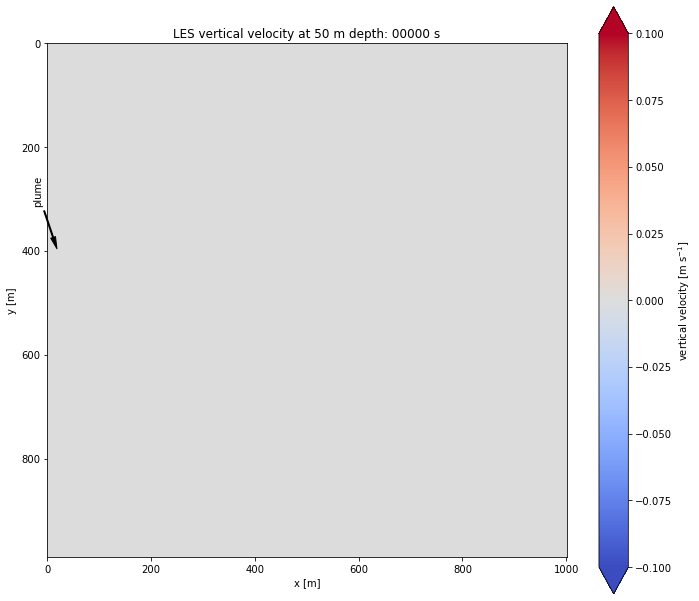

In [4]:
fig, ax = plt.subplots(figsize=(10, 9))

fig.tight_layout(pad=2)

# Plot the initial frame. 
cax = w_z[0, ...].plot(
    ax=ax,
#     add_colorbar=True,
    cmap='coolwarm',
    vmin=-0.1, vmax=0.1,
    cbar_kwargs={
        'extend':'both',
        'label':'vertical velocity [m s$^{-1}]$',
    }
)

ax.invert_yaxis()
ax.set_aspect("equal")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title(f"LES vertical velocity at 50 m depth: {int(w_z.time.values[0]):05d} s")

ax.annotate("plume", (20, 400), xytext=(-20, 60), textcoords="offset points", 
            rotation="vertical", arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            horizontalalignment='center', verticalalignment='center')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(w_z[frame, ...].values.flatten())
    ax.set_title(f"LES vertical velocity at 50 m depth: {int(w_z.time.values[frame]):05d} s")    

# Finally, we use the animation module to create the animation.
ani_w_z = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=w_z.time.size,       # Could also be iterable or list
    interval=100     # ms between frames
)

In [5]:
ani_w_z.save('../figures/w_z.mp4', dpi=180)